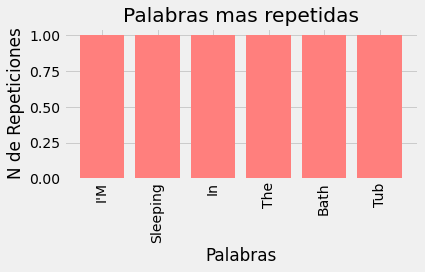

/Users/nachopascualrodriguez/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


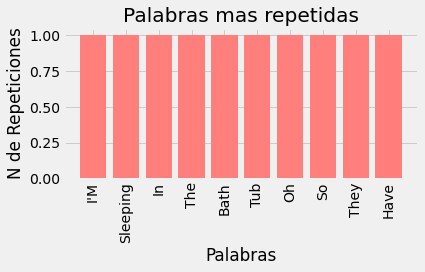

/Users/nachopascualrodriguez/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


KeyboardInterrupt: 

In [10]:
import requests
import time
import csv
import matplotlib.pyplot as plt
import operator
from matplotlib.animation import FuncAnimation


palabras={}

def timer():
  while True:
    
    respuesta =requests.get('https://thesimpsonsquoteapi.glitch.me/quotes')
    frase=respuesta.json()[0]['quote']
    personaje=respuesta.json()[0]['character']
    #print(frase)
    #print(personaje)
    

    simbolos = ['¿','?','.','.',';',':','¡','!','"',',']
    for simbolo in simbolos:
      frase = frase.replace(simbolo,' ')
    palabras_frase = ((frase.lower()).title()).split()
    #print(palabras_frase)
    for palabra in palabras_frase:
      palabras[palabra] = palabras.get(palabra , 0) + 1    
      
    for key in palabras:
      if palabras[key] == 1:
        veces = 'vez'
      else:
        veces='veces'
      
      #print(f'La palabra {key} se ha repetido {palabras[key]} {veces}')
    #print(palabras)
    palabras_odenado = dict(sorted(palabras.items(), key=operator.itemgetter(1), reverse=True)[:10])
    grades = palabras_odenado.keys()
    count = palabras_odenado.values()
    plt.bar(grades, count, color = ["#ff7f7d"])
    plt.xlabel("Palabras")
    plt.ylabel("N de Repeticiones")
    plt.title("Palabras mas repetidas")
    plt.xticks(rotation=90)
    def animate(i):
        grades.update(palabras_odenado.keys())
        count.update(palabras_odenado.values())
        plt.close()
        plt.plot(grades,count)

    ani = FuncAnimation(plt.gcf(), animate, interval=1000)

    plt.tight_layout()

    plt.show()
   

    


    time.sleep(1) 
timer()
